In [1]:
# Importing Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import json

from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
# Authentication
with open("config.json") as token:
    key=json.load(token)
consumerKey = key["consumerKey"]
consumerSecret = key["consumerSecret"]
accessToken = key["accessToken"]
accessTokenSecret = key["accessTokenSecret"]

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [3]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = round(positive,1)
negative = round(negative,1)
neutral = round(neutral,1)

Please enter keyword or hashtag to search: messi
Please enter how many tweets to analyze: 100


In [4]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  100
positive number:  33
negative number:  15
neutral number:  52


In [5]:
#Removing Duplicate Tweets
tweet_list.drop_duplicates(inplace = True)

In [6]:
tweet_list

,0
0,@lawzanaqrawi @MusialaEra He talks more about ...
1,@cesc_messi_fans @galeon_esp @Chamartin4ever E...
2,RT @Barca_Buzz: 📸| Lionel Messi with his recor...
3,RT @BIGdrakerr: The worldd knows Lewandowski d...
4,Football is mudded. Messi just needs to get #7...
...,...
95,RT @moussaalyy: @__cheikhba j’étais un pro mes...
96,@FUTDonkey You don’t need to use the “more bal...
97,RT @xmilianx_: che viejo todo bien que cagó a ...
98,RT @jupiter_riccis: I don't care if Messi dese...


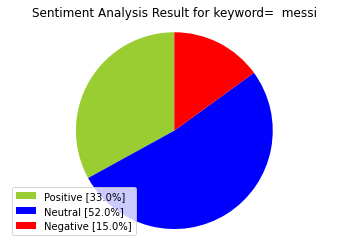

In [7]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [8]:
#Cleaning Text (RT, Punctuation etc)
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,@lawzanaqrawi @MusialaEra He talks more about ...,he talks more about messi than bayern
1,@cesc_messi_fans @galeon_esp @Chamartin4ever E...,messi fans esp el nico deportista de eq...
2,RT @Barca_Buzz: 📸| Lionel Messi with his recor...,lionel messi with his record 8th pichichi ...
3,RT @BIGdrakerr: The worldd knows Lewandowski d...,the worldd knows lewandowski deserves the bal...
4,Football is mudded. Messi just needs to get #7...,football is mudded messi just needs to get 7...
5,RT @DanikRM_: En 2010 Messi le robó el Balón d...,en 2010 messi le rob el bal n de oro a inies...
6,RT @Ligue1_ENG: 👟⚽️ 𝗠𝗿. 𝗛𝗮𝘁-𝘁𝗿𝗶𝗰𝗸 𝗼𝗳 𝗮𝘀𝘀𝗶𝘀𝘁𝘀.\...,it s the 5 ...
7,@spfcdaopressao Ninguém se destaca pode dar se...,ningu m se destaca pode dar sempre para o me...
8,RT @AllhassaneSimon: Enlevez Messi dedans tchr...,enlevez messi dedans tchrrrr c est pas gr ce ...
9,@Bernabeuwhites Literally oblak was animalisti...,literally oblak was animalistic last season ...


In [9]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,@lawzanaqrawi @MusialaEra He talks more about ...,he talks more about messi than bayern,0.500000,0.500000,neutral,0.000,1.000,0.000,0.0000
1,@cesc_messi_fans @galeon_esp @Chamartin4ever E...,messi fans esp el nico deportista de eq...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
2,RT @Barca_Buzz: 📸| Lionel Messi with his recor...,lionel messi with his record 8th pichichi ...,0.500000,0.500000,positive,0.000,0.782,0.218,0.6486
3,RT @BIGdrakerr: The worldd knows Lewandowski d...,the worldd knows lewandowski deserves the bal...,0.216667,0.383333,positive,0.000,0.764,0.236,0.7579
4,Football is mudded. Messi just needs to get #7...,football is mudded messi just needs to get 7...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
5,RT @DanikRM_: En 2010 Messi le robó el Balón d...,en 2010 messi le rob el bal n de oro a inies...,0.000000,0.000000,negative,0.146,0.854,0.000,-0.5574
6,RT @Ligue1_ENG: 👟⚽️ 𝗠𝗿. 𝗛𝗮𝘁-𝘁𝗿𝗶𝗰𝗸 𝗼𝗳 𝗮𝘀𝘀𝗶𝘀𝘁𝘀.\...,it s the 5 ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
7,@spfcdaopressao Ninguém se destaca pode dar se...,ningu m se destaca pode dar sempre para o me...,1.000000,0.300000,positive,0.000,0.741,0.259,0.6369
8,RT @AllhassaneSimon: Enlevez Messi dedans tchr...,enlevez messi dedans tchrrrr c est pas gr ce ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
9,@Bernabeuwhites Literally oblak was animalisti...,literally oblak was animalistic last season ...,0.027778,0.383333,positive,0.000,0.711,0.289,0.7579


In [10]:
#Function for counting values in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [11]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,45,47.37
positive,39,41.05
negative,11,11.58


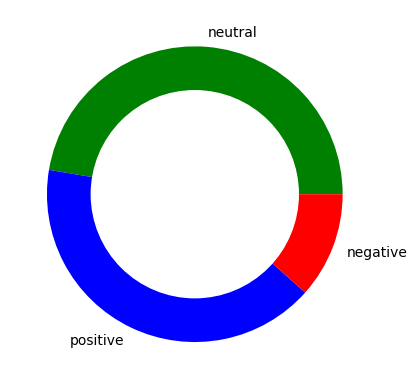

In [12]:
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]

my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [13]:
#Calculating tweet's length and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [14]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,106.36
neutral,77.44
positive,104.41


In [15]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,21.00
neutral,14.29
positive,19.03


In [16]:
#Most Used Words
pd.DataFrame(Counter(" ".join(tw_list["text"]).split()).most_common(10),columns=["word","number"])

,word,number
0,messi,88
1,the,42
2,a,34
3,or,22
4,s,20
5,ballon,20
6,d,20
7,de,18
8,el,14
9,n,14
